In [ ]:
#must install mglearn

In [ ]:
import os # The file has no headers naming the columns, so we pass 
import numpy as np
import mglearn
import pandas as pd



header=None # and provide the column names explicitly in "names" 
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data") 
data = pd.read_csv( adult_path, header=None, index_col=False, names=['age', 'workclass', 'fnlwgt', 'education',
                                                                     'education-num', 'marital-status', 'occupation', 'relationship', 'race',
                                                                     'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']) 

# For illustration purposes, we only select some of the columns 
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']] 
# IPython.display allows nice output formatting within the Jupyter notebook 
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [ ]:
print(data.gender.value_counts())
print(data.workclass.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


In [ ]:
print("Original features:\n", list(data.columns), "\n") 

# get_dummies permite crear otro df donde las variables categoricas se convierten a numericas codificada, like one-hot, deja las numericas quietas
data_dummies = pd.get_dummies(data) 
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [ ]:
display(data.head())
display(data_dummies.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,gender_ Female,gender_ Male,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving'] 
# Extract NumPy arrays 
X = features.values 
y = data_dummies['income_ >50K'].values 
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
logreg = LogisticRegression() 
logreg.fit(X_train, y_train) 
print("Train score: {:.2f}".format(logreg.score(X_train, y_train)))
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Train score: 0.81
Test score: 0.81


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Que pasa cuando tengo variables numericas que representan categorias
# create a DataFrame with an integer feature and a categorical string feature 
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1], 'Categorical Feature': ['socks', 'fox', 'socks', 'box']}) 
display(demo_df)
display(pd.get_dummies(demo_df))

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder 
# Setting sparse=False means OneHotEncode will return a numpy array, not a sparse matrix 
ohe = OneHotEncoder(sparse=False)
#print(ohe.fit_transform(demo_df))

In [ ]:
ohe_data = ohe.fit_transform(data)
print(ohe.get_feature_names())
display(ohe_data)

['x0_17' 'x0_18' 'x0_19' 'x0_20' 'x0_21' 'x0_22' 'x0_23' 'x0_24' 'x0_25'
 'x0_26' 'x0_27' 'x0_28' 'x0_29' 'x0_30' 'x0_31' 'x0_32' 'x0_33' 'x0_34'
 'x0_35' 'x0_36' 'x0_37' 'x0_38' 'x0_39' 'x0_40' 'x0_41' 'x0_42' 'x0_43'
 'x0_44' 'x0_45' 'x0_46' 'x0_47' 'x0_48' 'x0_49' 'x0_50' 'x0_51' 'x0_52'
 'x0_53' 'x0_54' 'x0_55' 'x0_56' 'x0_57' 'x0_58' 'x0_59' 'x0_60' 'x0_61'
 'x0_62' 'x0_63' 'x0_64' 'x0_65' 'x0_66' 'x0_67' 'x0_68' 'x0_69' 'x0_70'
 'x0_71' 'x0_72' 'x0_73' 'x0_74' 'x0_75' 'x0_76' 'x0_77' 'x0_78' 'x0_79'
 'x0_80' 'x0_81' 'x0_82' 'x0_83' 'x0_84' 'x0_85' 'x0_86' 'x0_87' 'x0_88'
 'x0_90' 'x1_ ?' 'x1_ Federal-gov' 'x1_ Local-gov' 'x1_ Never-worked'
 'x1_ Private' 'x1_ Self-emp-inc' 'x1_ Self-emp-not-inc' 'x1_ State-gov'
 'x1_ Without-pay' 'x2_ 10th' 'x2_ 11th' 'x2_ 12th' 'x2_ 1st-4th'
 'x2_ 5th-6th' 'x2_ 7th-8th' 'x2_ 9th' 'x2_ Assoc-acdm' 'x2_ Assoc-voc'
 'x2_ Bachelors' 'x2_ Doctorate' 'x2_ HS-grad' 'x2_ Masters'
 'x2_ Preschool' 'x2_ Prof-school' 'x2_ Some-college' 'x3_ Female'
 'x3_ M

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer( [("scaling", StandardScaler(), ['age', 'hours-per-week']), 
                         ("onehot", OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])])


In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

data_features = data.drop("income", axis=1)
X_train, X_test, y_train, y_test = train_test_split( data_features, data.income, random_state=0)

ct.fit(X_train)

X_train_trans = ct.transform(X_train)
X_test_trans = ct.transform(X_test)
print(X_train.shape)
print(X_train_trans.shape)

(24420, 6)
(24420, 44)


In [ ]:
logreg = LogisticRegression(max_iter=1000) 
logreg.fit(X_train_trans, y_train) 

print("Test score: {:.2f}".format(logreg.score(X_test_trans, y_test)))

Test score: 0.81


---


Text(0.5, 0, 'Input feature')

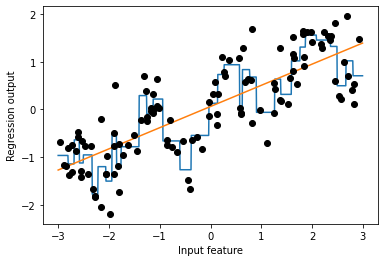

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

X, y = mglearn.datasets.make_wave(n_samples=120) 
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1) 

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y) 
plt.plot(line, reg.predict(line), label="decision tree") 

reg = LinearRegression().fit(X, y) 
plt.plot(line, reg.predict(line), label="linear regression") 

plt.plot(X[:, 0], y, 'o', c='k') 
plt.ylabel("Regression output") 
plt.xlabel("Input feature") 

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins = 10, strategy = 'uniform')
# el metodo halla los extremos para luego poder hacer la transformación
kb.fit(X)
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


In [ ]:
X_binned = kb.transform(X)

print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

Text(0.5, 0, 'Input feature')

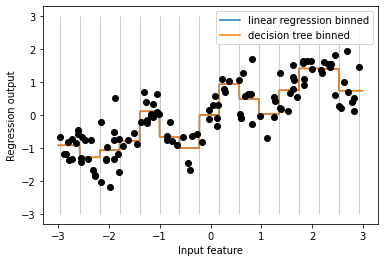

In [ ]:
kb = KBinsDiscretizer(n_bins=15, strategy='uniform', encode='onehot-dense') 
kb.fit(X) 
X_binned = kb.transform(X)
line_binned = kb.transform(line)

#al transformar los datos en bins permite que el regresor lineal sea muchisimo mas flexible
reg = LinearRegression().fit(X_binned, y) 
plt.plot(line, reg.predict(line_binned), label='linear regression binned') 

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y) 
plt.plot(line, reg.predict(line_binned), label='decision tree binned')

plt.plot(X[:, 0], y, 'o', c='k') 
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2) 
plt.legend(loc="best") 
plt.ylabel("Regression output") 
plt.xlabel("Input feature")

(120, 16)


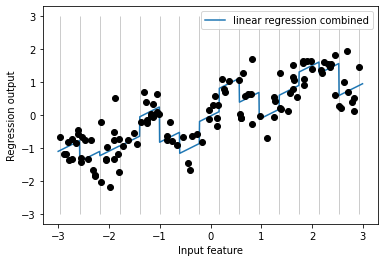

In [ ]:
# se agrega el vector original de entrada, lo que agrega una pendiente general para todos los bin

X_combined = np.hstack([X, X_binned]) 
print(X_combined.shape)

reg = LinearRegression().fit(X_combined, y) 
line_combined = np.hstack([line, line_binned]) 
plt.plot(line, reg.predict(line_combined), label='linear regression combined') 
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best") 
plt.ylabel("Regression output") 
plt.xlabel("Input feature") 
plt.plot(X[:, 0], y, 'o',c='k')

(120, 30)


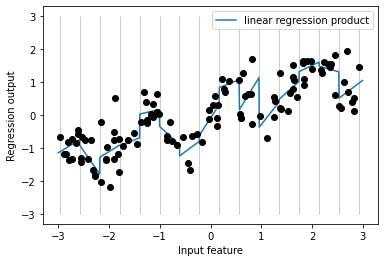

In [ ]:
X_product = np.hstack([X_binned, X * X_binned]) 
print(X_product.shape)

reg = LinearRegression().fit(X_product, y) 
line_product = np.hstack([line_binned, line * line_binned]) 
plt.plot(line, reg.predict(line_product), label='linear regression product') 
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2) 
plt.plot(X[:, 0], y, 'o', c='k') 
plt.ylabel("Regression output") 
plt.xlabel("Input feature") 
plt.legend(loc="best")